#**NASA-NEAREST EARTH OBJECTS**

Data Source: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/neo_v2.csv')

In [ ]:
dataset.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
dataset.shape

(90836, 10)

In [ ]:
dataset.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
dataset[dataset.columns].nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [ ]:
#In the dataset, the columns 'ID' and 'name' are not contributing much whereas the columns 'orbiting_body' and 'sentry_object' has
#only one unique value which will induce bias in the model if we don't drop them
data = dataset.drop(columns=['id','name','orbiting_body','sentry_object'], axis=1)
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [ ]:
#I am encoding the target variable using the Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['hazardous'] = le.fit_transform(data['hazardous'])

In [ ]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


<Axes: xlabel='hazardous', ylabel='est_diameter_min'>

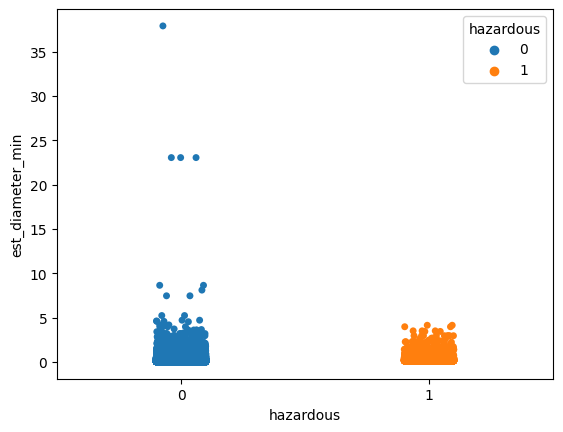

In [ ]:
sns.stripplot(data, x='hazardous', y='est_diameter_min', hue='hazardous')

<Axes: xlabel='hazardous', ylabel='est_diameter_max'>

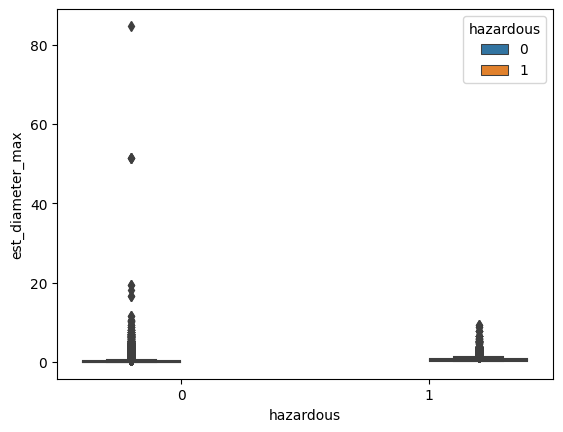

In [ ]:
sns.boxplot(data, x='hazardous', y='est_diameter_max', hue='hazardous')

<Axes: xlabel='hazardous', ylabel='relative_velocity'>

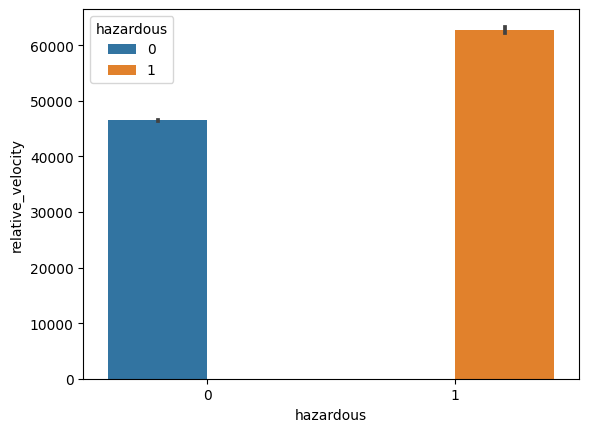

In [ ]:
sns.barplot(data, x='hazardous', y='relative_velocity', hue='hazardous')

<ipython-input-41-cd2e4f263823>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['miss_distance'])


<Axes: xlabel='miss_distance', ylabel='Density'>

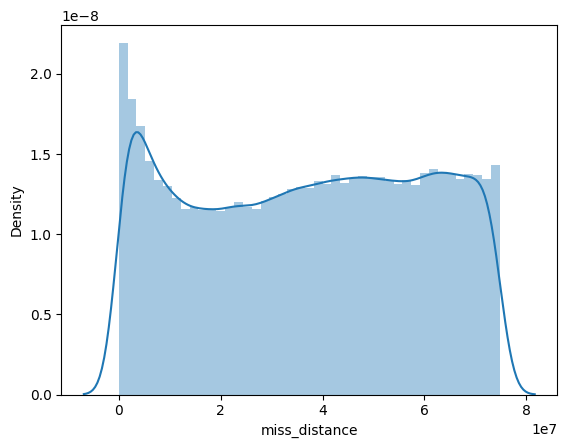

In [ ]:
sns.distplot(data['miss_distance'])

<Axes: xlabel='hazardous', ylabel='absolute_magnitude'>

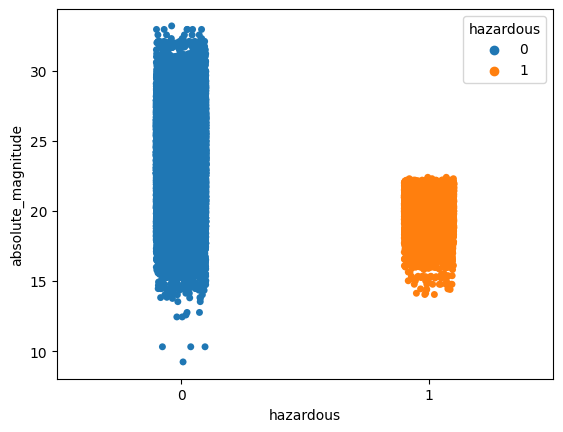

In [ ]:
sns.stripplot(data, x='hazardous', y='absolute_magnitude', hue='hazardous')

In [ ]:
#Here, I am splitting the dataset into Dependant and Indenpendent variables
X = data.drop(columns=['hazardous'], axis=1)
y = data['hazardous']

In [ ]:
#We are splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#After splitting the datasdet, I am scaling two columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train['relative_velocity'] = scaler.fit_transform(X_train['relative_velocity'].values.reshape(-1, 1))
X_test['relative_velocity'] = scaler.transform(X_test['relative_velocity'].values.reshape(-1, 1))

X_train['miss_distance'] = scaler.fit_transform(X_train['miss_distance'].values.reshape(-1, 1))
X_test['miss_distance'] = scaler.transform(X_test['miss_distance'].values.reshape(-1, 1))

X_train['absolute_magnitude'] = scaler.fit_transform(X_train['absolute_magnitude'].values.reshape(-1, 1))
X_test['absolute_magnitude'] = scaler.transform(X_test['absolute_magnitude'].values.reshape(-1, 1))

In [ ]:
X_train.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
6593,0.023150,0.051765,0.236610,0.386648,0.654871
3438,0.025384,0.056760,0.282660,0.992529,0.646134
86016,0.017561,0.039268,0.096142,0.875155,0.681083
29014,0.036691,0.082043,0.237590,0.310153,0.611184
32065,0.018389,0.041119,0.226749,0.636496,0.676715


In [ ]:
X_train.shape

(72668, 5)

In [ ]:
# Here I am using the Randomized Search CV to figure out the best model parameters and configuration for random forest classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Creating the parameter grid, from which the Randomized Search CV will pick out the best parameter for best performance
param_grid = {'n_estimators': [10, 15, 30, 50, 100, 150],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
              'max_leaf_nodes': list(range(10, 51)),
              'min_samples_split': [2, 5, 10],
              'bootstrap': [True, False]}

classifier = RandomForestClassifier(random_state=1)

random_search = RandomizedSearchCV(classifier, param_grid, scoring= 'roc_auc', n_iter= 10, random_state=1)

search_fit = random_search.fit(X_train, y_train)

In [ ]:
#The best model parameters are shown with this line of code
search_fit.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'max_leaf_nodes': 47,
 'max_features': 0.5,
 'max_depth': 6,
 'bootstrap': True}

In [ ]:
#The best random forest estimator with parameter is shown with this line of code
search_fit.best_estimator_

RandomForestClassifier(max_depth=6, max_features=0.5, max_leaf_nodes=47,
                       min_samples_split=10, n_estimators=150, random_state=1)

In [ ]:
#Here I am trying to predict the Test dataset values based on the best estimator that we got above
best_estimator = search_fit.best_estimator_

y_pred = best_estimator.predict(X_test)

In [ ]:
#After predicting the test dataset values, I am calculating the accuracy score of the model
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", Accuracy)

Accuracy:  0.9139145750770585
